## Import Resources

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
print('Using:')
print('- TensorFlow version:', tf.__version__)
print('- u2022 Running on GPU' if tf.test.is_gpu_available() else '- GPU device not found. Running on CPU')

Using:
- TensorFlow version: 2.15.0
- GPU device not found. Running on CPU


## Load the Dataset

In [7]:
training_set, dataset_info = tfds.load('mnist', split='train', as_supervised = True, with_info = True)

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [14]:
print(training_set.element_spec)


(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


## Pipeline

In [15]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

num_training_examples = dataset_info.splits['train'].num_examples

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)

In [16]:
layer_neurons = [512, 256, 128, 56, 28, 14]

my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Flatten(input_shape = (28,28,1)))
for i in layer_neurons:
    my_model.add(tf.keras.layers.Dense(i, activation = 'relu'))

my_model.add(tf.keras.layers.Dense(10, activation='softmax'))

my_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = my_model.evaluate(image_batch, label_batch)

print(f'\nLoss befor training: {loss:,.3f}')
print(f'Accuracy befor training: {accuracy:.3%}')

2/2 [==============================] - 1s 15ms/step - loss: 2.3049 - accuracy: 0.0781

Loss befor training: 2.305
Accuracy befor training: 7.812%


In [18]:
EPOCHS = 10
my_model.fit(training_batches, epochs = EPOCHS)

for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = my_model.evaluate(image_batch, label_batch)

print(f'\nLoss after training: {loss:,.3f}')
print(f'Accuracy after training: {accuracy:.3%}')

Epoch 1/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0296 - accuracy: 0.9908
Epoch 2/10
938/938 [==============================] - 13s 13ms/step - loss: 0.0224 - accuracy: 0.9935
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0198 - accuracy: 0.9946
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0188 - accuracy: 0.9945
Epoch 6/10
938/938 [==============================] - 13s 13ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0143 - accuracy: 0.9959
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0163 - accuracy: 0.9954
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0142 - accuracy: 0.9961
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 4.5630e-05

2/2 [==============================] - 0s 8ms/step


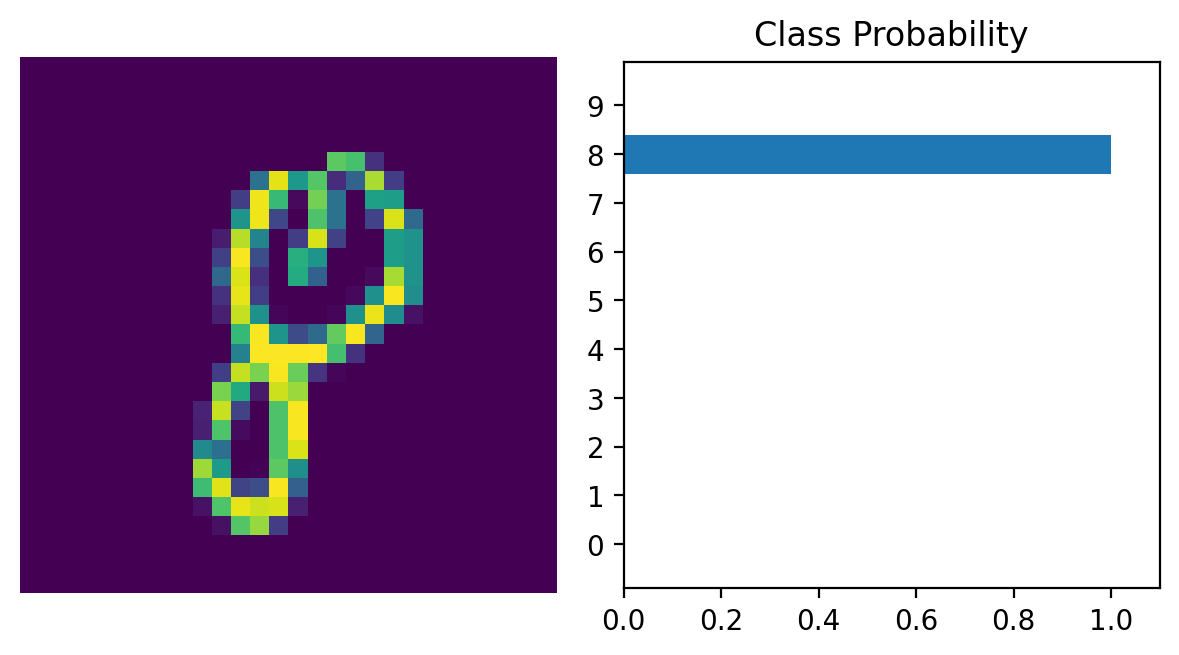

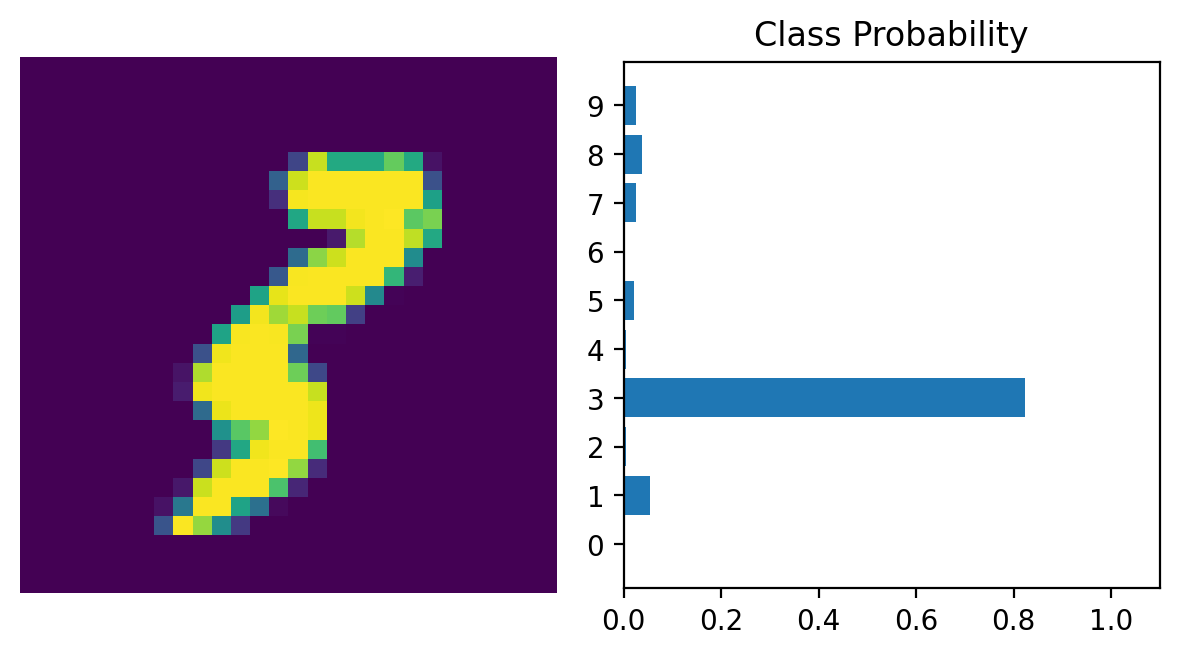

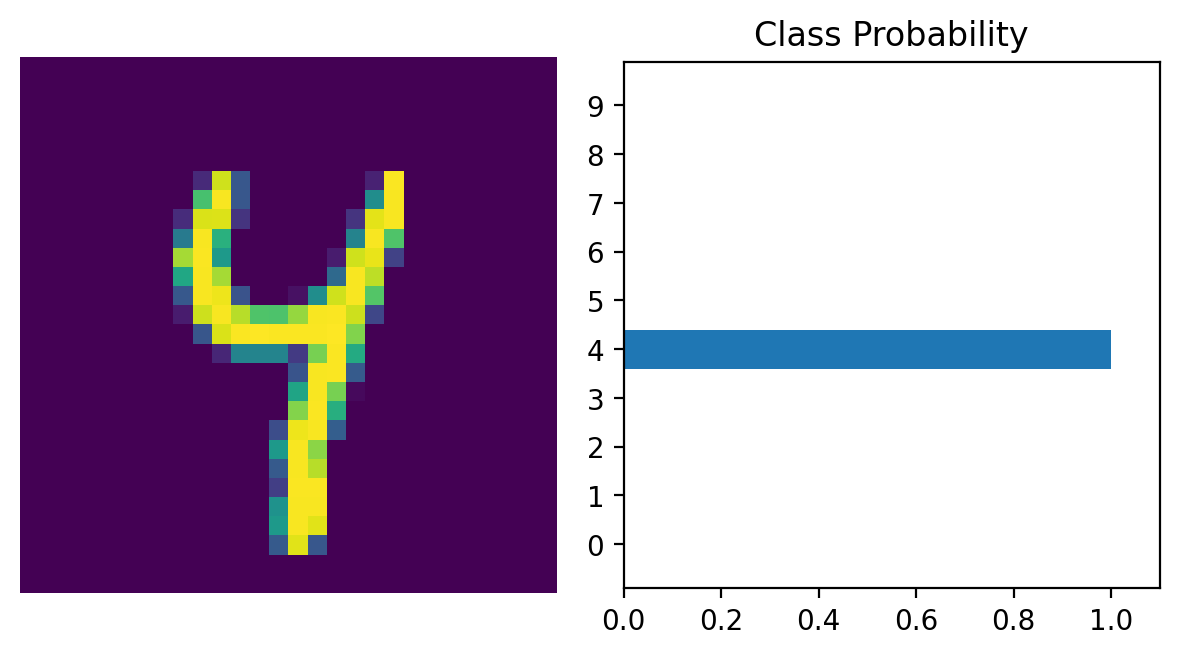

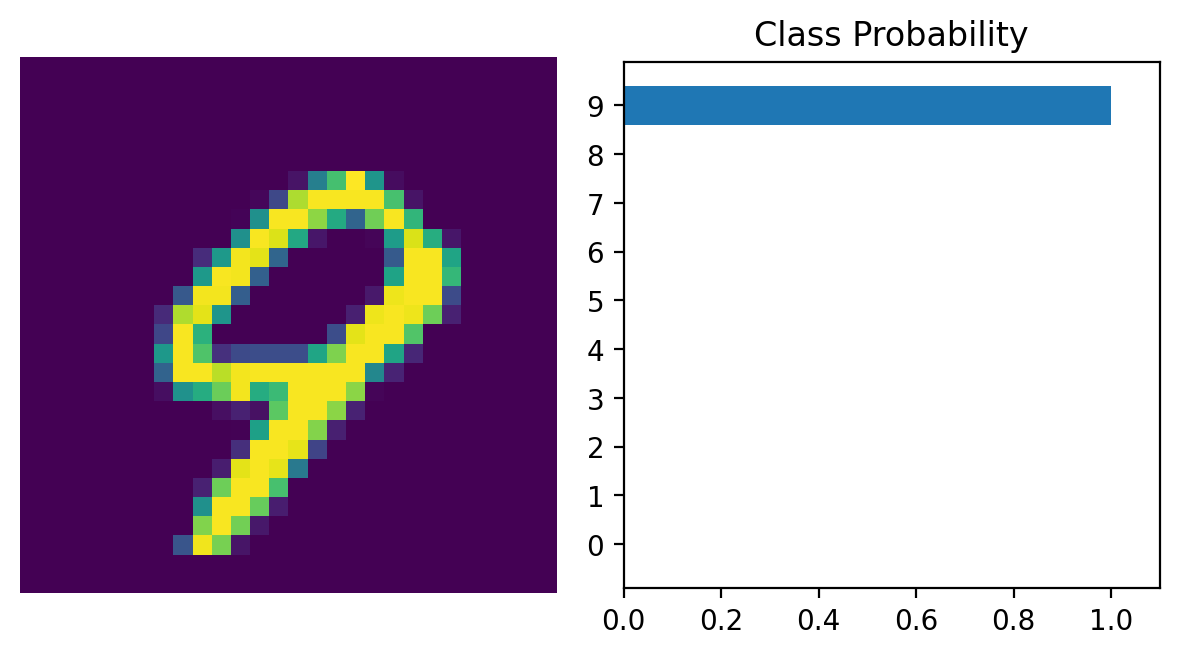

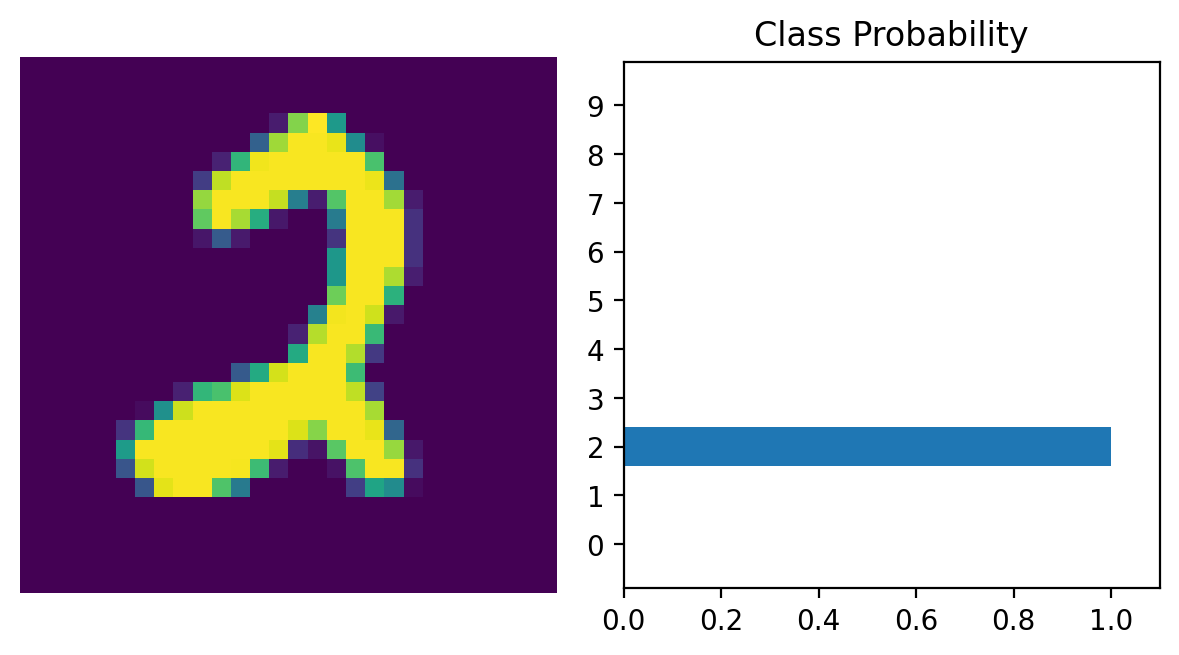

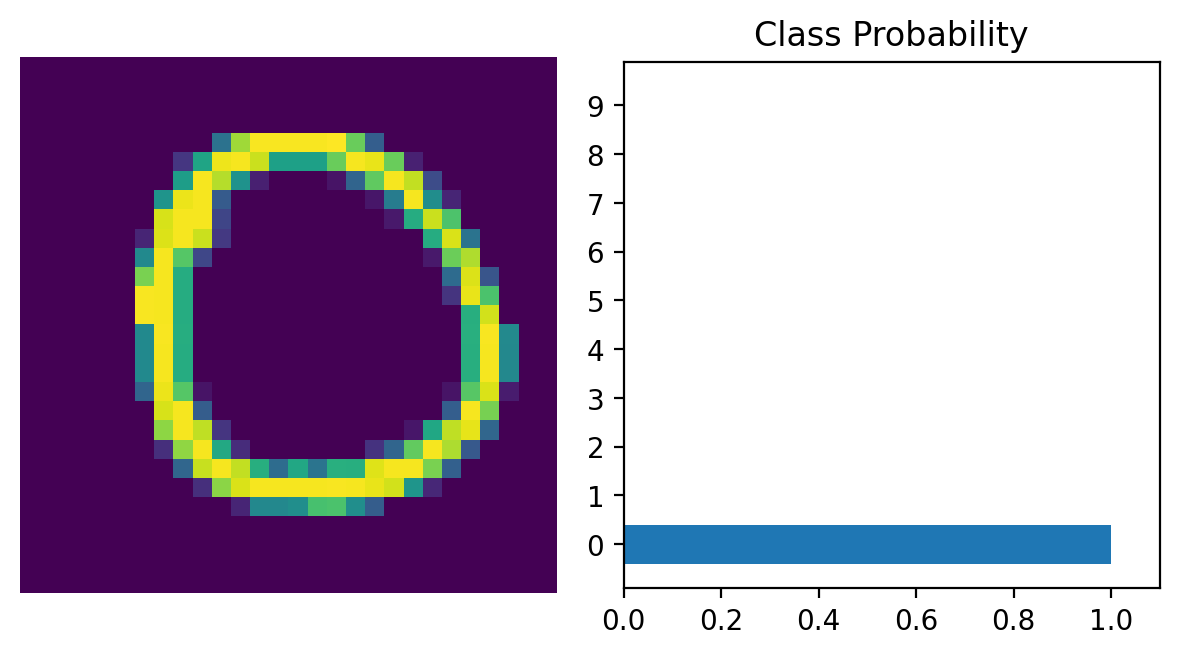

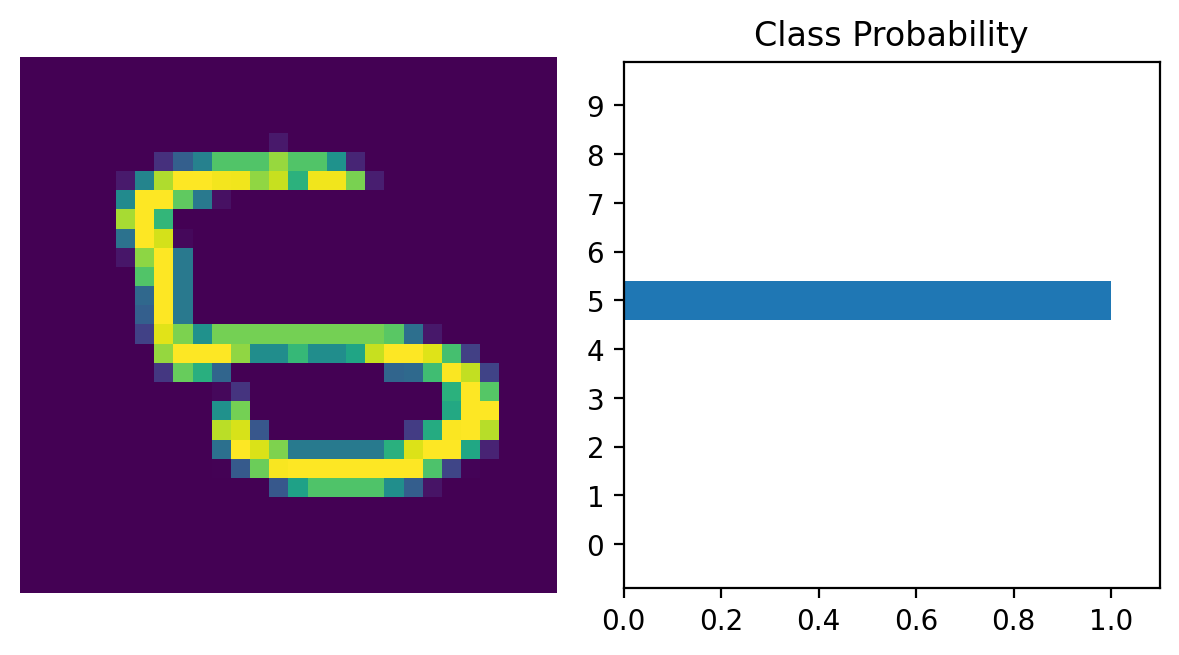

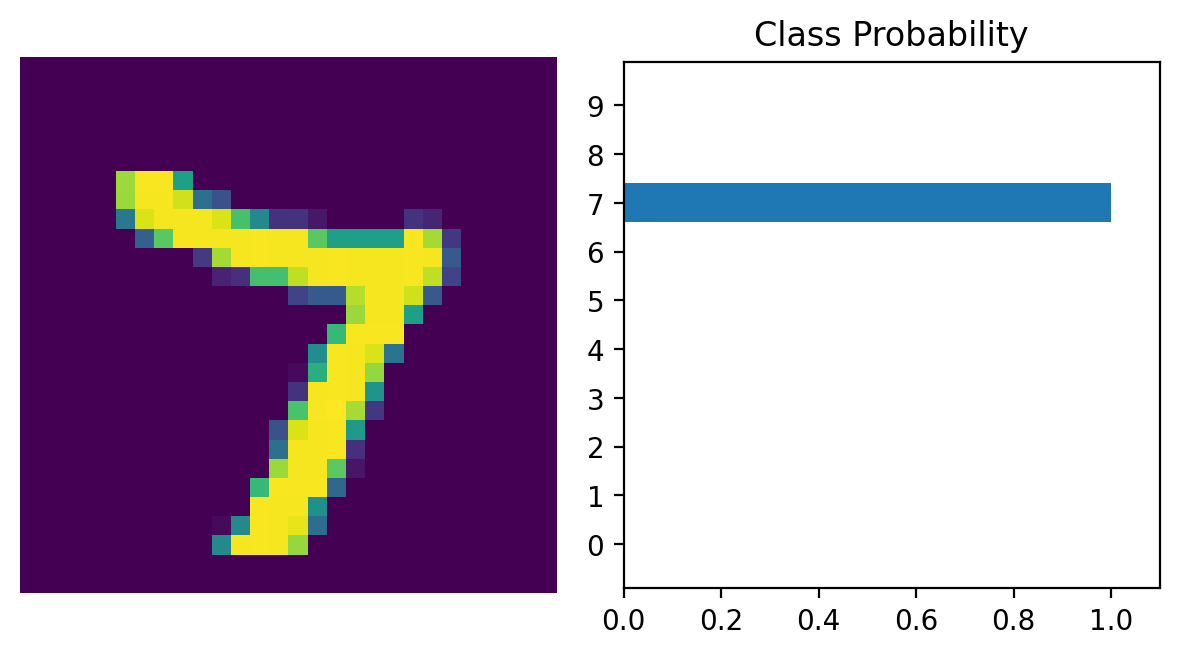

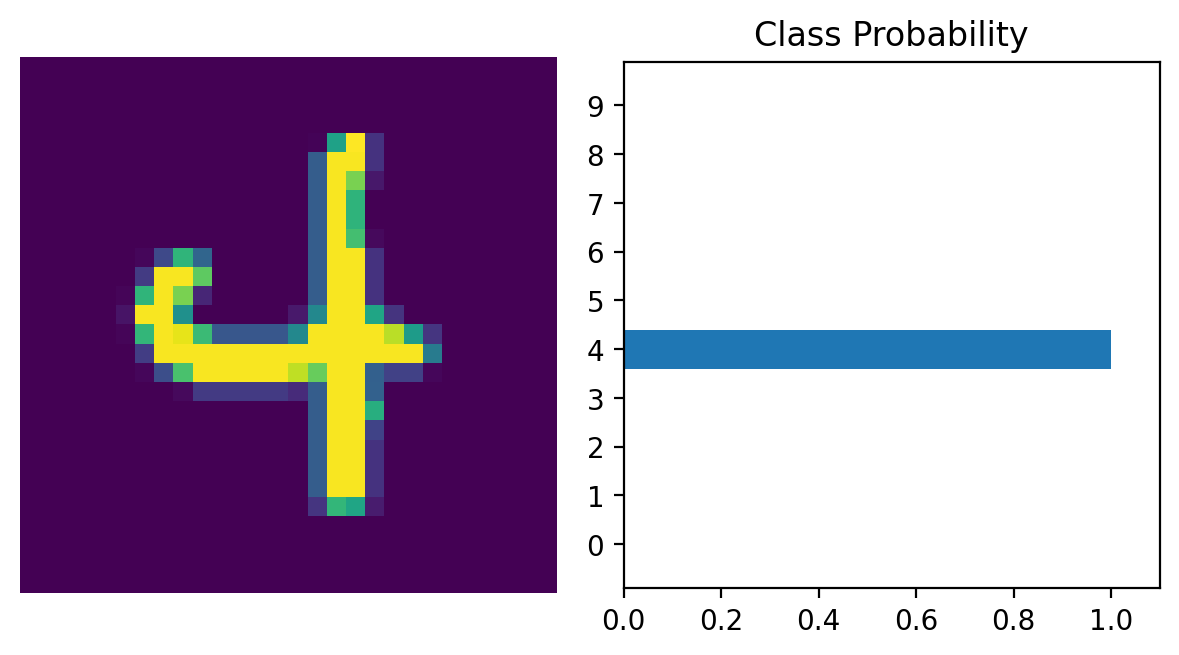

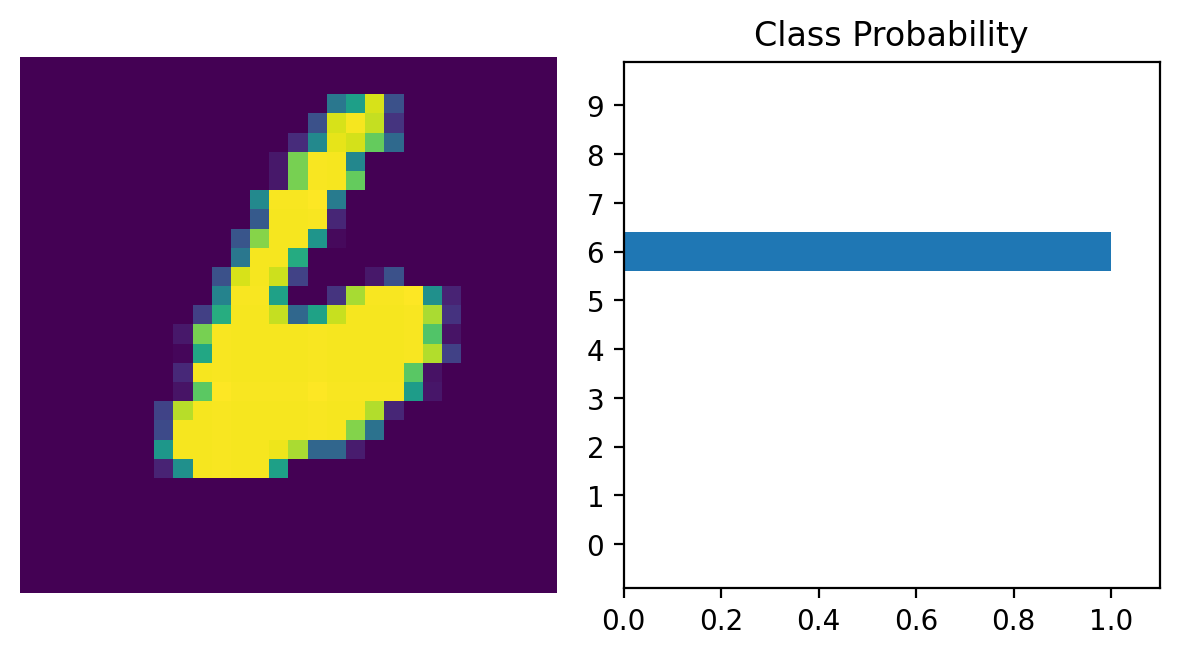

In [19]:
for image_batch, label_batch in training_batches.take(10):
    ps = my_model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(first_image)
    ax1.axis('off')
    ax2.barh(np.arange(10), ps[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()